## Set the event name to choose event and the plot type

In [4]:
#Event selection
eventname = 'GW150914'

#Plots setting
make_plots = 1
plottype = "png"

## Standard import

In [3]:
# Standard python numerical analysis imports:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# LIGO-specific readligo.py 
import readligo as rl

## Event Reading

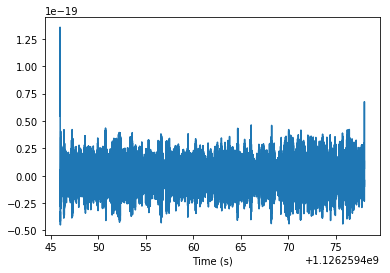

In [3]:
# As an example we use the GW150914 data
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

merger = Merger("GW150914")

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

#### Preconditioning
Because of the finite range of DFFT, we had spikes at the ends of data, and we shall romove them.

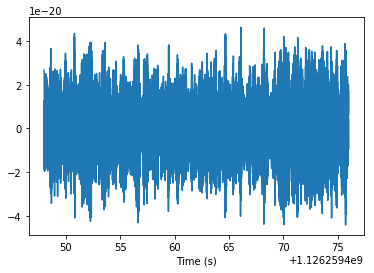

In [63]:
# Remove 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

## Wave Form Generation

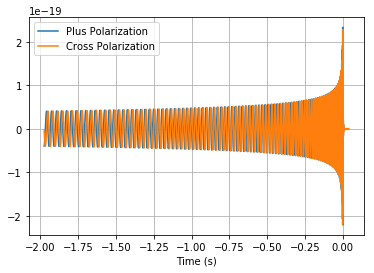

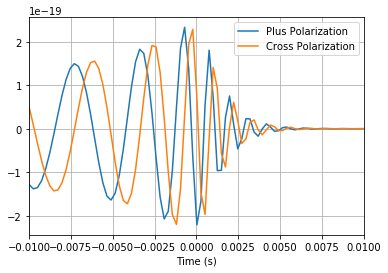

In [53]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

### Get PSD from the event data

In [60]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
import numpy as np
import matplotlib.mlab as mlab

psd = conditioned.psd(4)#take 4 seconds from our samples, noting here the pycbc.psd.welch() is applied.

psd = interpolate(psd, conditioned.delta_f)

# print(np.min(np.array(psd.sample_frequencies)))

psd = inverse_spectrum_truncation(psd, 4 * conditioned.sample_rate,low_frequency_cutoff=15)

In [61]:
import pycbc.psd
print(pycbc.psd.get_lalsim_psd_list())

['AdVBNSOptimizedSensitivityP1200087', 'AdVDesignSensitivityP1200087', 'AdVEarlyHighSensitivityP1200087', 'AdVEarlyLowSensitivityP1200087', 'AdVLateHighSensitivityP1200087', 'AdVLateLowSensitivityP1200087', 'AdVMidHighSensitivityP1200087', 'AdVMidLowSensitivityP1200087', 'AdvVirgo', 'CosmicExplorerP1600143', 'CosmicExplorerPessimisticP1600143', 'CosmicExplorerWidebandP1600143', 'EinsteinTelescopeP1600143', 'GEO', 'GEOHF', 'KAGRA', 'KAGRADesignSensitivityT1600593', 'KAGRAEarlySensitivityT1600593', 'KAGRALateSensitivityT1600593', 'KAGRAMidSensitivityT1600593', 'KAGRAOpeningSensitivityT1600593', 'TAMA', 'Virgo', 'aLIGOAPlusDesignSensitivityT1800042', 'aLIGOBHBH20Deg', 'aLIGOBHBH20DegGWINC', 'aLIGOBNSOptimizedSensitivityP1200087', 'aLIGODesignSensitivityP1200087', 'aLIGOEarlyHighSensitivityP1200087', 'aLIGOEarlyLowSensitivityP1200087', 'aLIGOHighFrequency', 'aLIGOHighFrequencyGWINC', 'aLIGOLateHighSensitivityP1200087', 'aLIGOLateLowSensitivityP1200087', 'aLIGOMidHighSensitivityP1200087', '

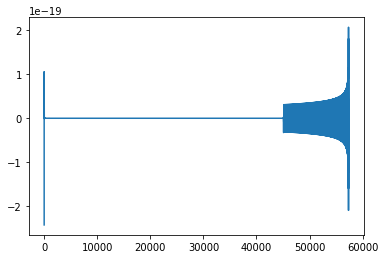

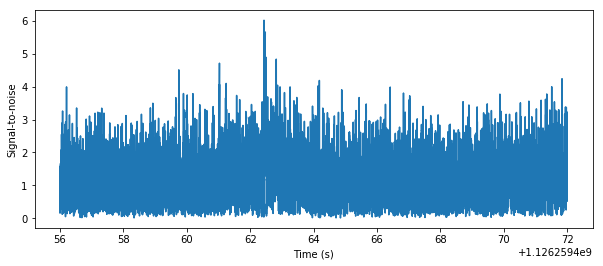

We found a signal at 1126259462.4365234s with SNR 6.017156832786584, m = 10


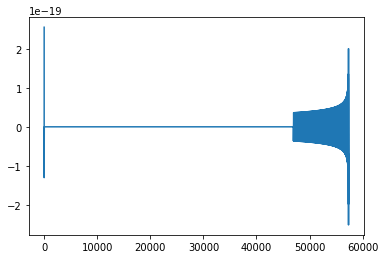

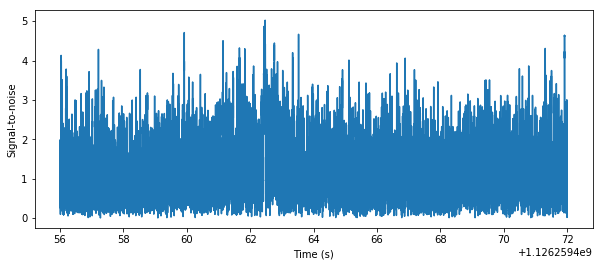

We found a signal at 1126259462.4731445s with SNR 5.022497714252992, m = 11


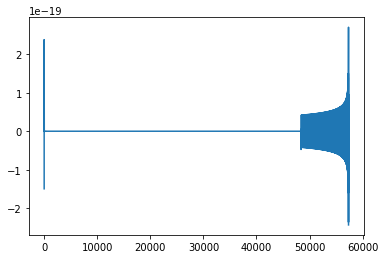

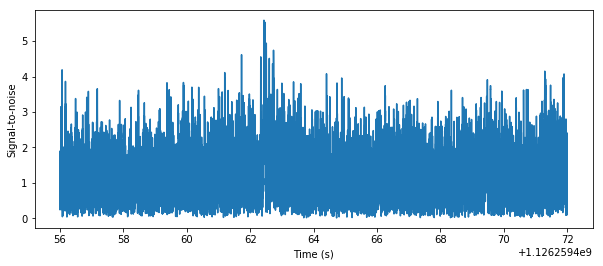

We found a signal at 1126259462.4350586s with SNR 5.590251797791087, m = 12


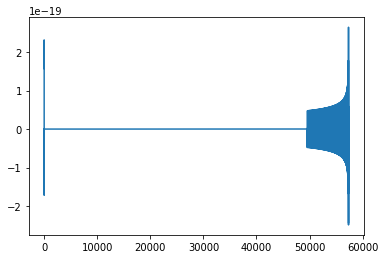

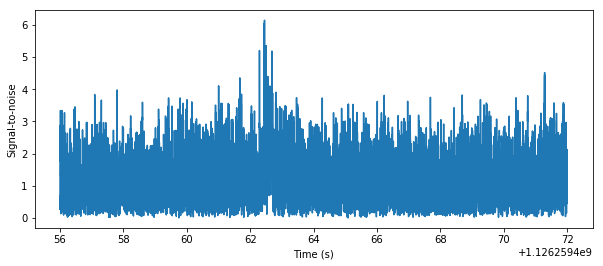

We found a signal at 1126259462.4516602s with SNR 6.145927628792963, m = 13


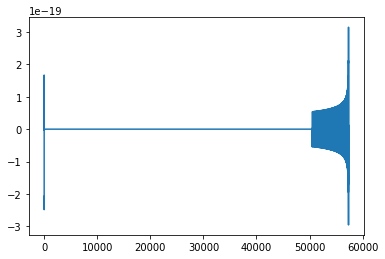

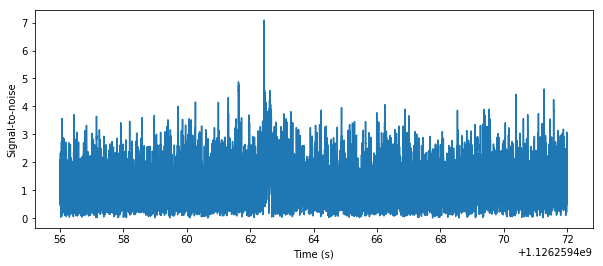

We found a signal at 1126259462.4418945s with SNR 7.082684021722335, m = 14


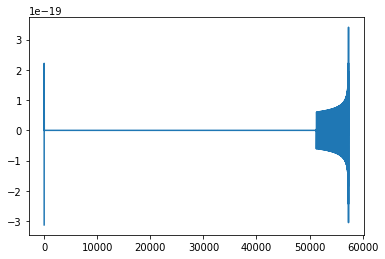

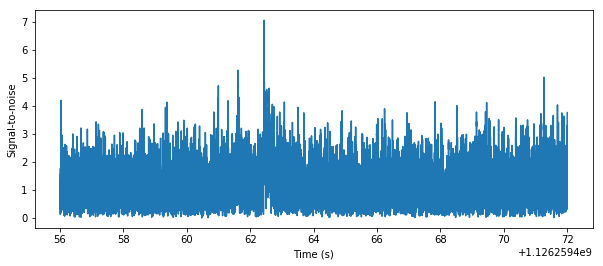

We found a signal at 1126259462.4414062s with SNR 7.05264476311594, m = 15


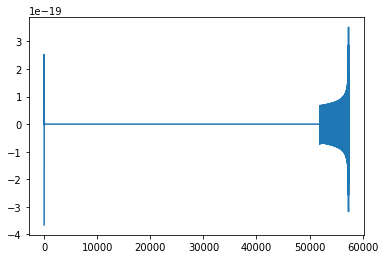

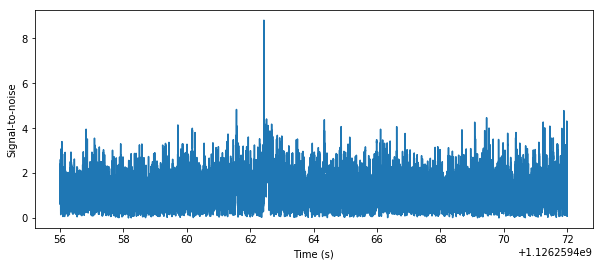

We found a signal at 1126259462.4331055s with SNR 8.81333643850891, m = 16


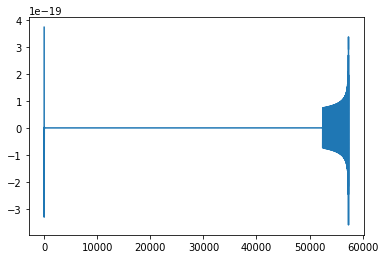

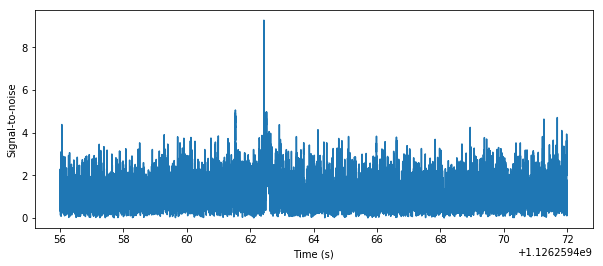

We found a signal at 1126259462.432129s with SNR 9.261549640792746, m = 17


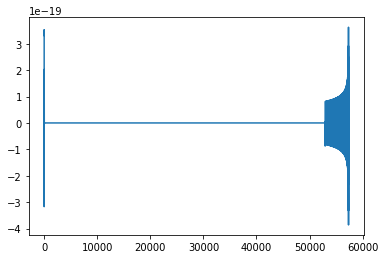

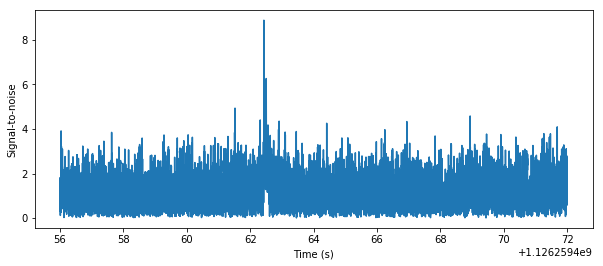

We found a signal at 1126259462.432129s with SNR 8.878637298979285, m = 18


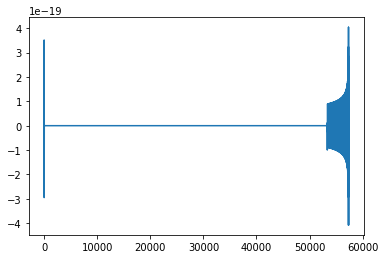

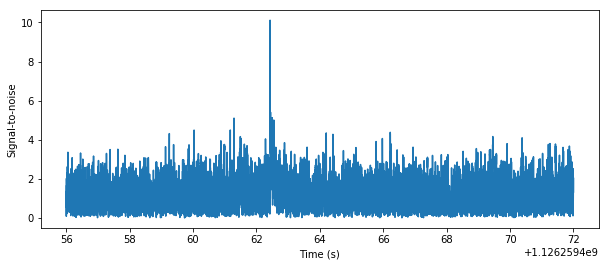

We found a signal at 1126259462.4311523s with SNR 10.11268169469774, m = 19


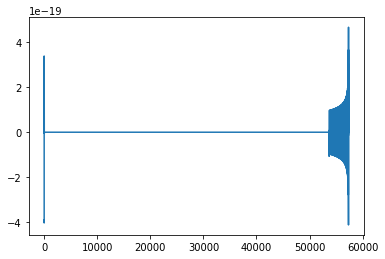

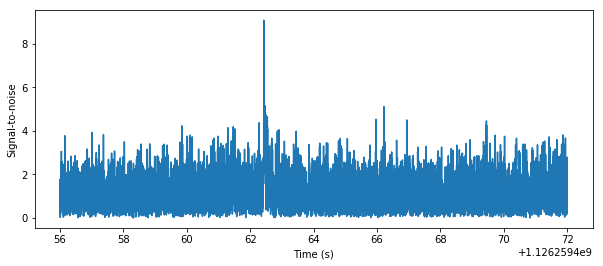

We found a signal at 1126259462.430664s with SNR 9.079398483291275, m = 20


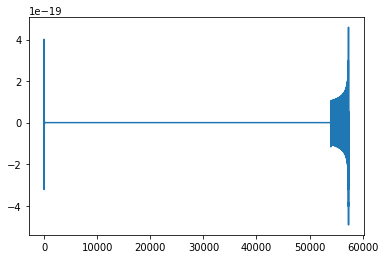

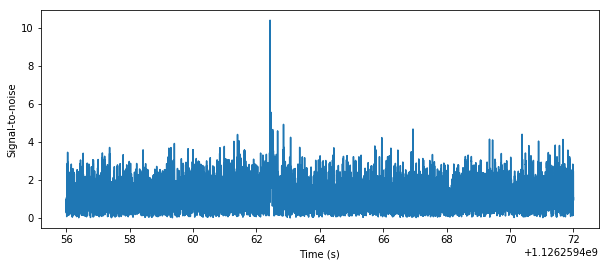

We found a signal at 1126259462.430664s with SNR 10.383953863690696, m = 21


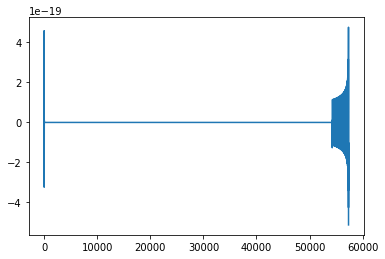

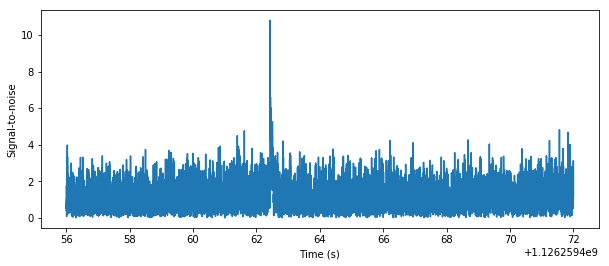

We found a signal at 1126259462.4296875s with SNR 10.798248445204099, m = 22


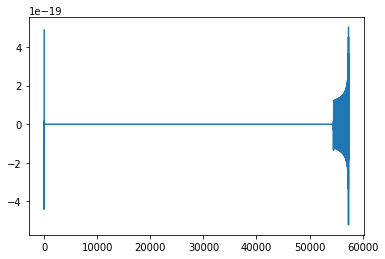

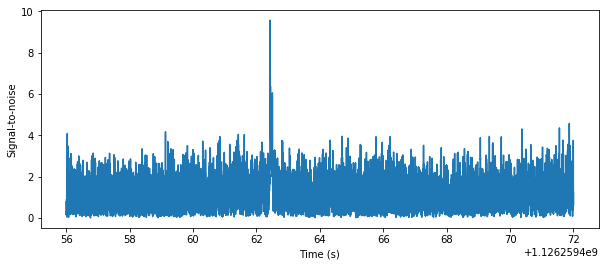

We found a signal at 1126259462.4296875s with SNR 9.573396130632878, m = 23


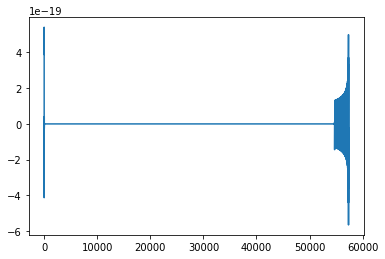

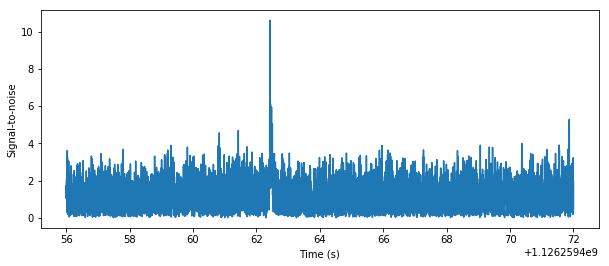

We found a signal at 1126259462.4296875s with SNR 10.608798365629942, m = 24


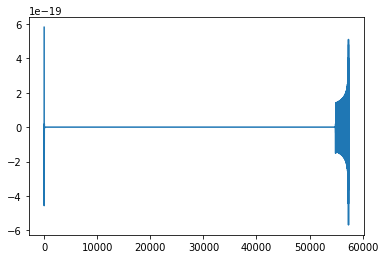

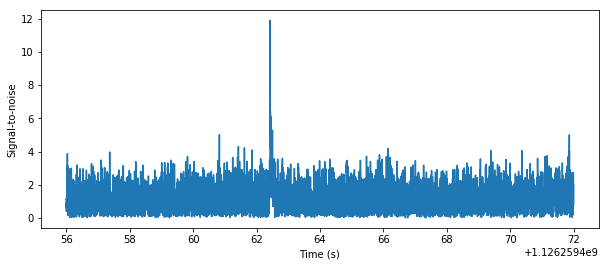

We found a signal at 1126259462.4291992s with SNR 11.898379004504385, m = 25


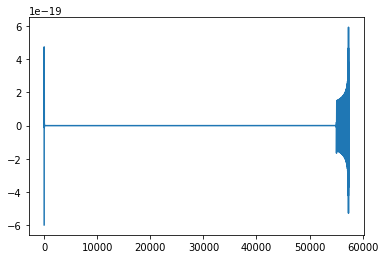

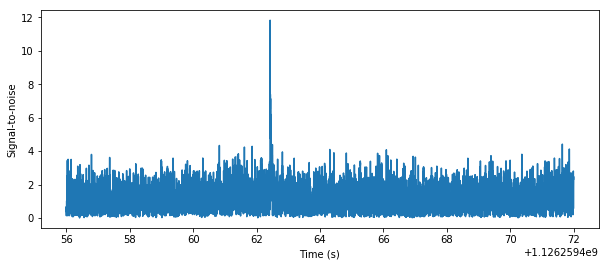

We found a signal at 1126259462.428711s with SNR 11.819171920282292, m = 26


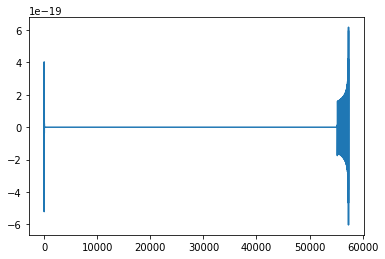

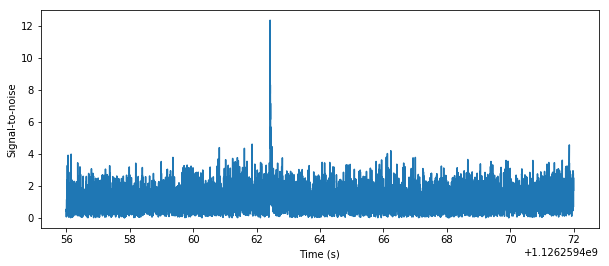

We found a signal at 1126259462.428711s with SNR 12.353990048410383, m = 27


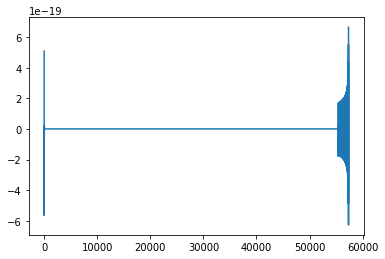

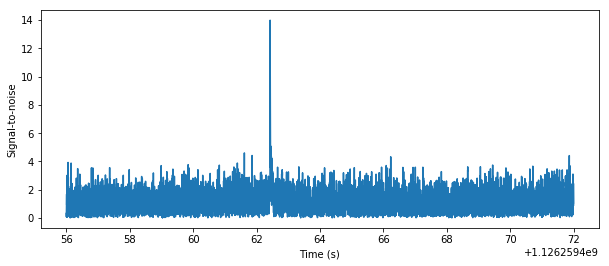

We found a signal at 1126259462.428711s with SNR 13.978095138976153, m = 28


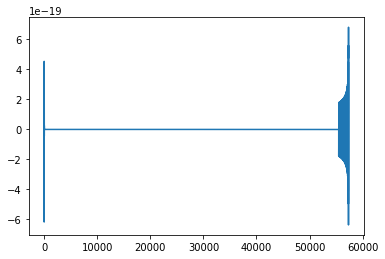

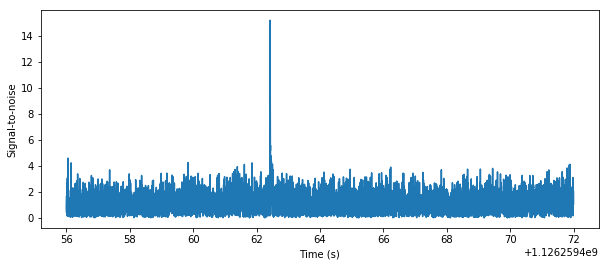

We found a signal at 1126259462.4282227s with SNR 15.190733980336116, m = 29


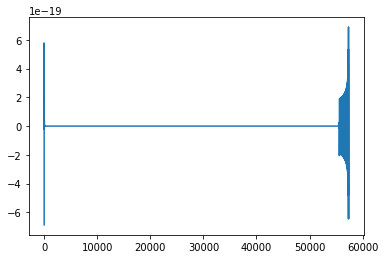

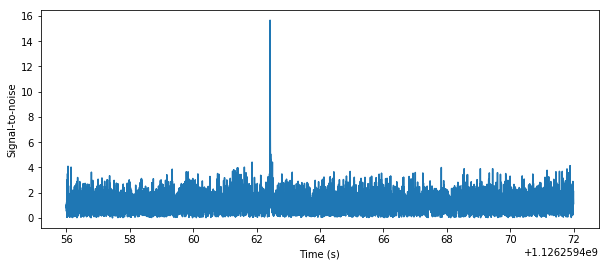

We found a signal at 1126259462.427246s with SNR 15.65774274198818, m = 30


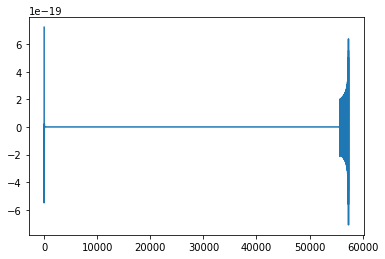

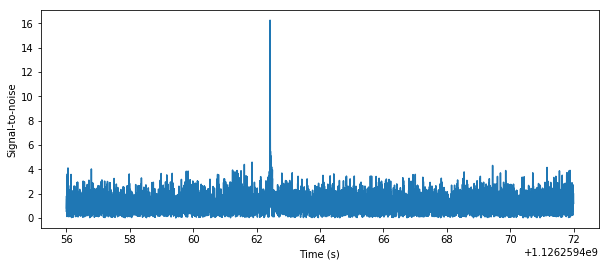

We found a signal at 1126259462.4267578s with SNR 16.24483346864865, m = 31


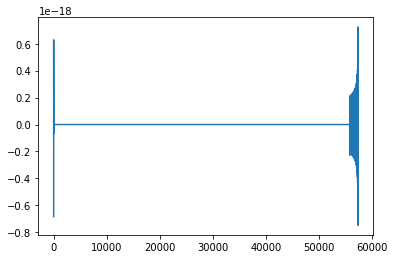

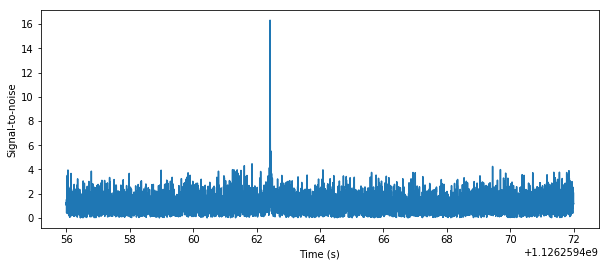

We found a signal at 1126259462.4267578s with SNR 16.311607158208478, m = 32


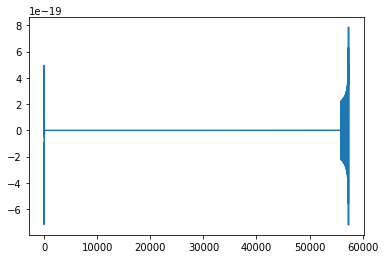

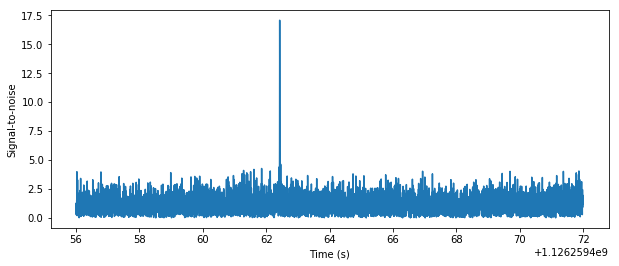

We found a signal at 1126259462.4262695s with SNR 17.069659744876464, m = 33


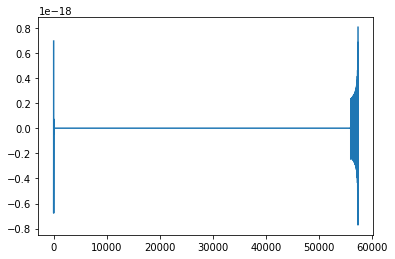

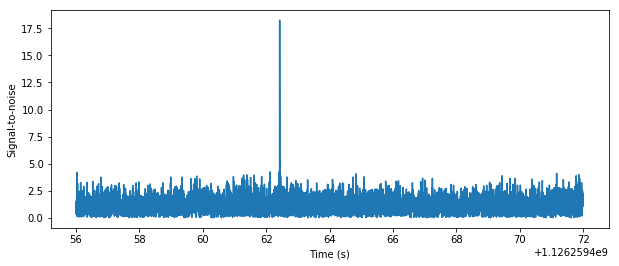

We found a signal at 1126259462.4257812s with SNR 18.22978967752675, m = 34


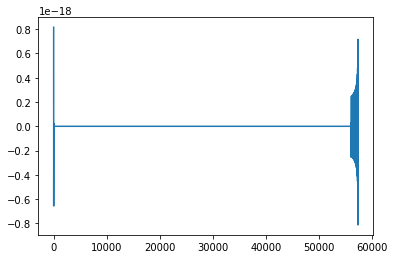

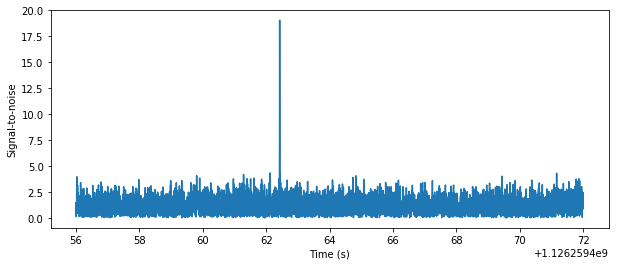

We found a signal at 1126259462.425293s with SNR 19.040259012501625, m = 35


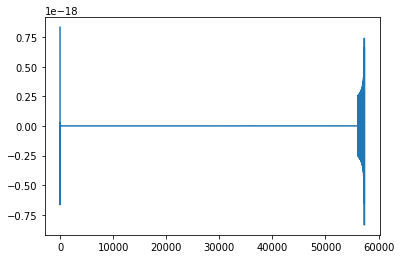

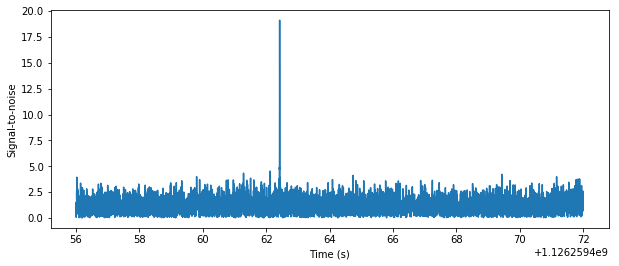

We found a signal at 1126259462.4248047s with SNR 19.10999504725549, m = 36


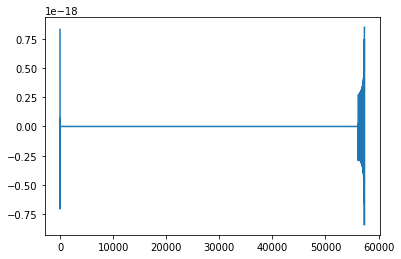

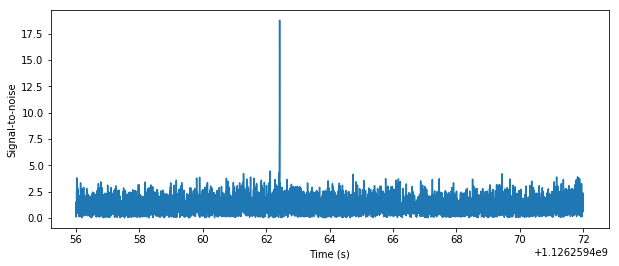

We found a signal at 1126259462.4243164s with SNR 18.789435929392624, m = 37


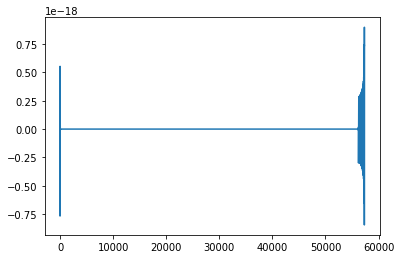

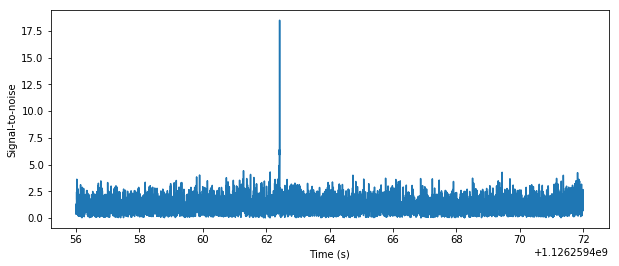

We found a signal at 1126259462.4238281s with SNR 18.492888191756645, m = 38


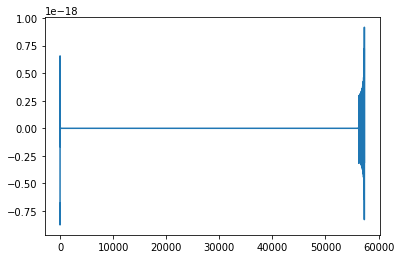

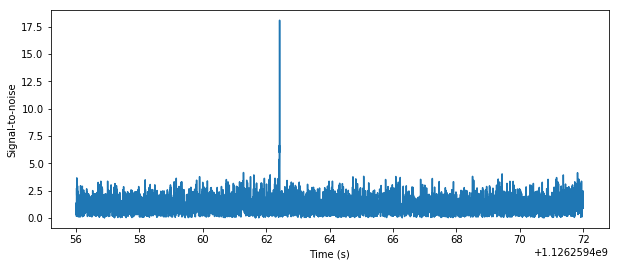

We found a signal at 1126259462.4233398s with SNR 18.07333496536642, m = 39


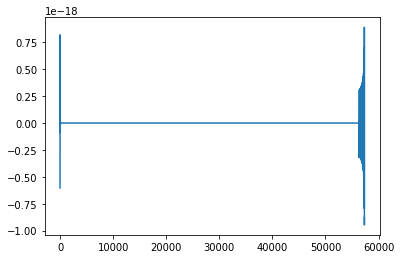

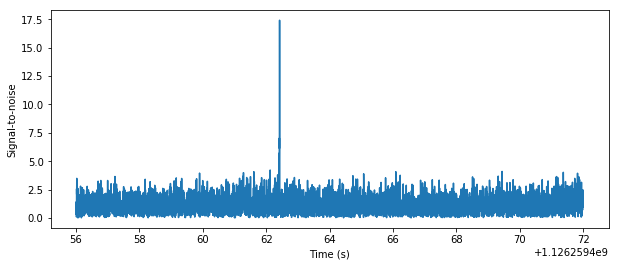

We found a signal at 1126259462.4228516s with SNR 17.419356010820703, m = 40


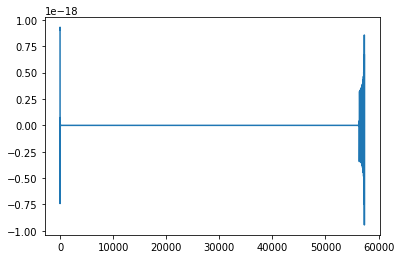

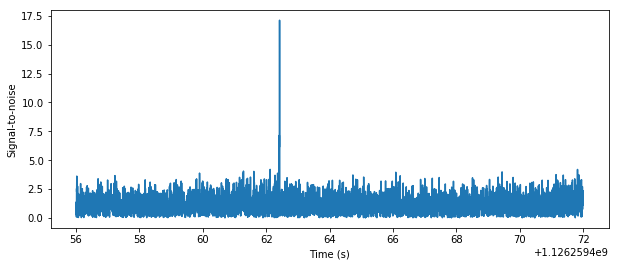

We found a signal at 1126259462.4223633s with SNR 17.11113775041467, m = 41


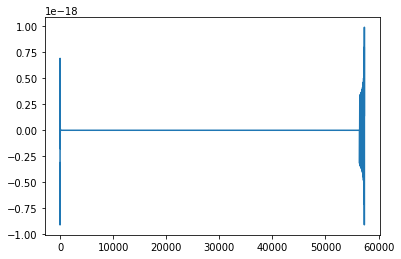

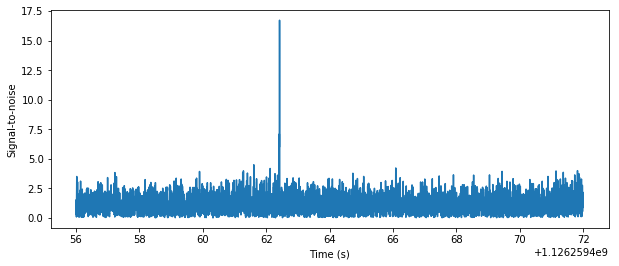

We found a signal at 1126259462.421875s with SNR 16.72302997580925, m = 42


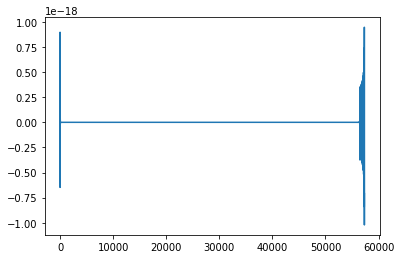

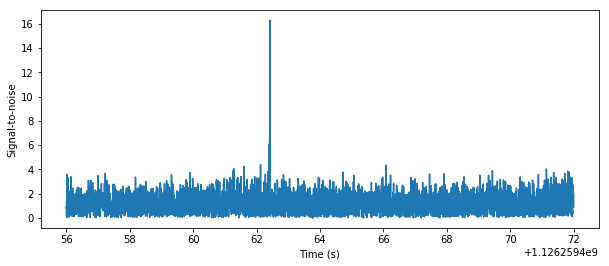

We found a signal at 1126259462.4213867s with SNR 16.294905519073875, m = 43


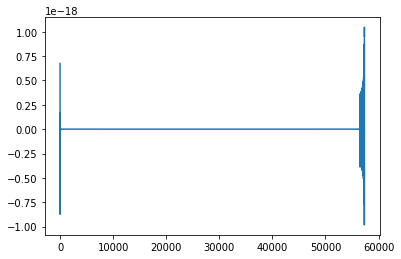

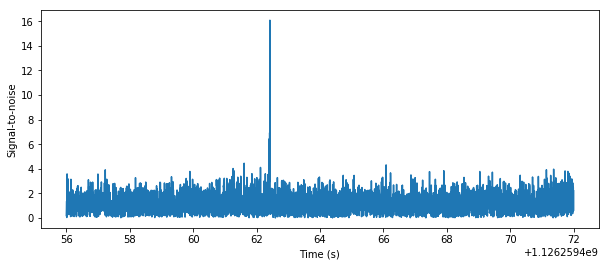

We found a signal at 1126259462.4208984s with SNR 16.080826143158987, m = 44


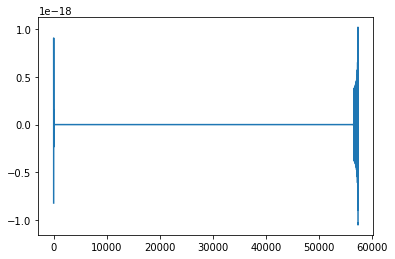

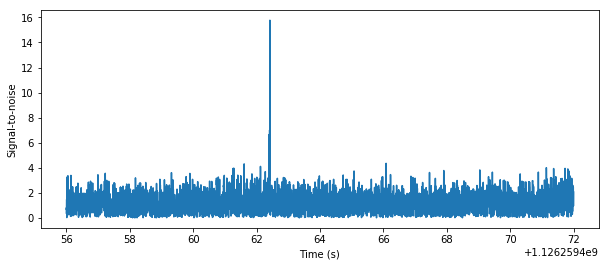

We found a signal at 1126259462.4208984s with SNR 15.770112219867586, m = 45


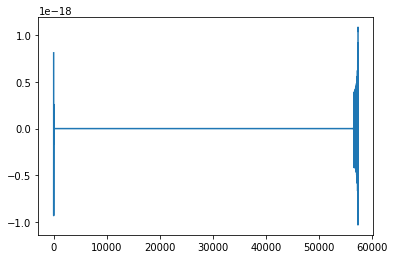

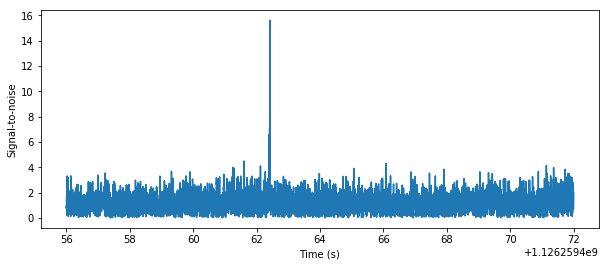

We found a signal at 1126259462.4204102s with SNR 15.60366043187642, m = 46


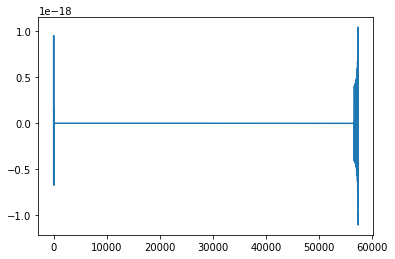

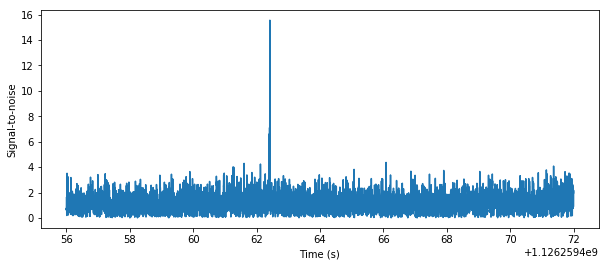

We found a signal at 1126259462.4199219s with SNR 15.551483141035394, m = 47


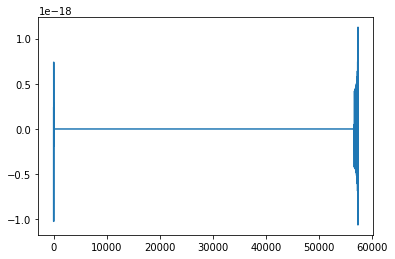

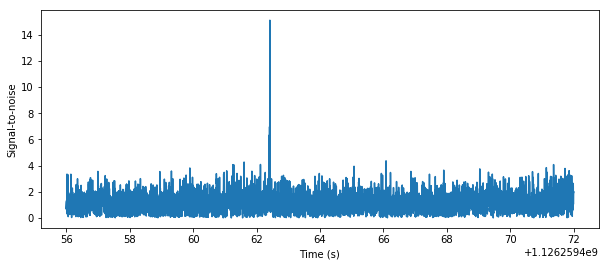

We found a signal at 1126259462.4199219s with SNR 15.106109164144522, m = 48


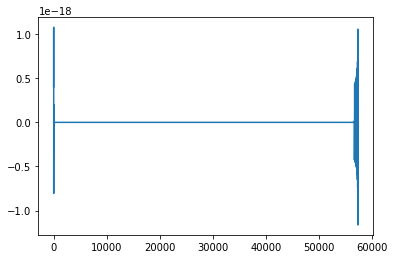

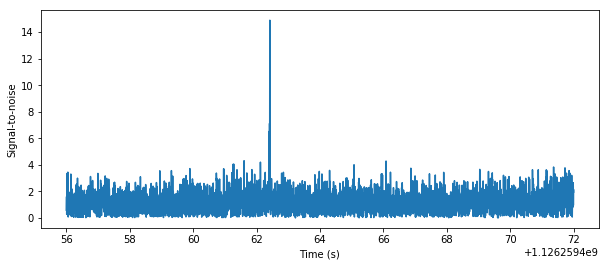

We found a signal at 1126259462.4189453s with SNR 14.889880515794538, m = 49


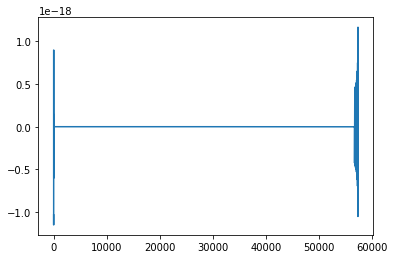

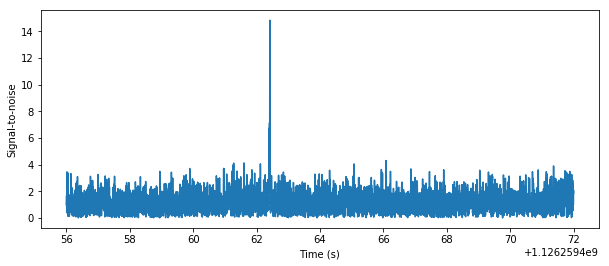

We found a signal at 1126259462.4189453s with SNR 14.818678774950738, m = 50


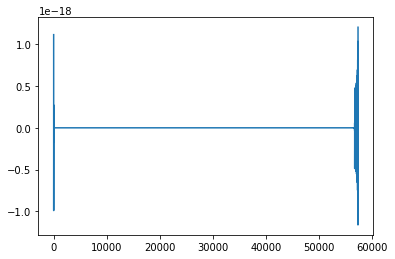

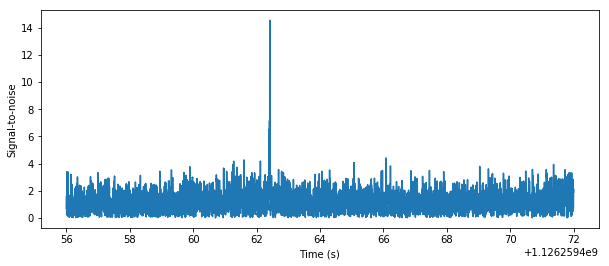

We found a signal at 1126259462.418457s with SNR 14.54382456188774, m = 51


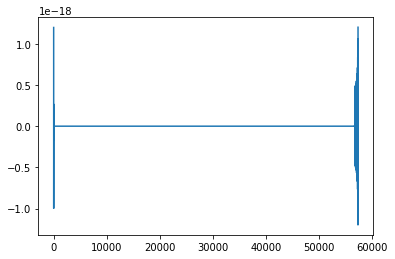

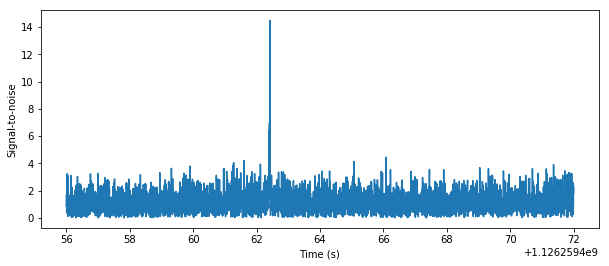

We found a signal at 1126259462.4179688s with SNR 14.50252872136825, m = 52


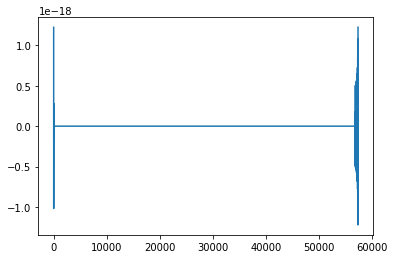

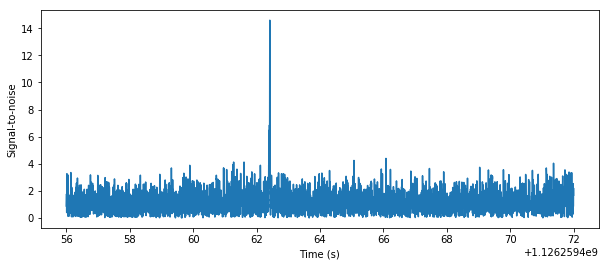

We found a signal at 1126259462.4179688s with SNR 14.589663609479317, m = 53


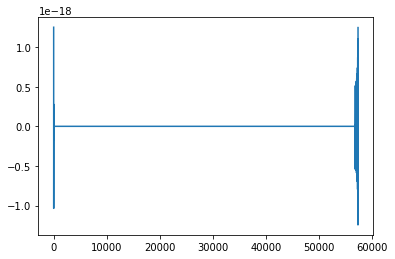

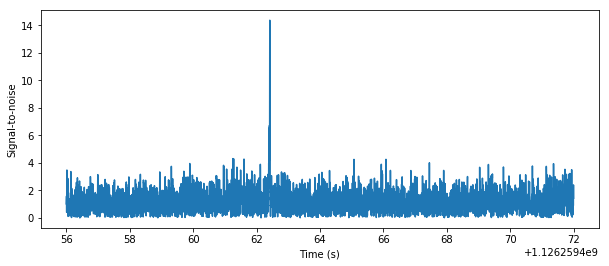

We found a signal at 1126259462.4174805s with SNR 14.376425315823047, m = 54


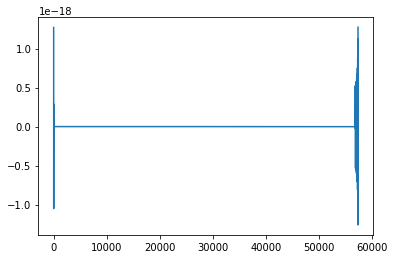

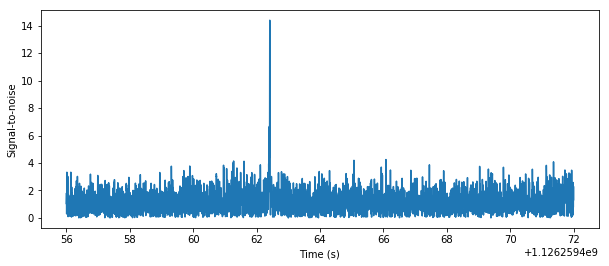

We found a signal at 1126259462.4169922s with SNR 14.389267778331087, m = 55


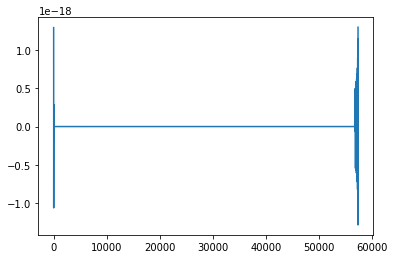

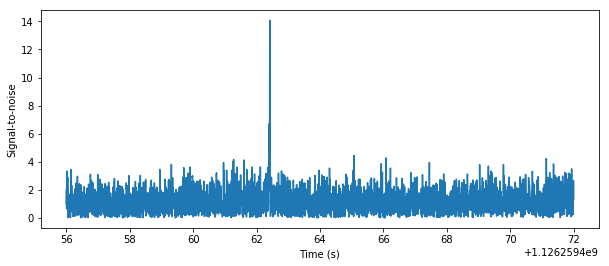

We found a signal at 1126259462.4169922s with SNR 14.079356922054394, m = 56


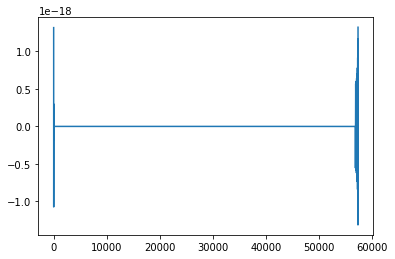

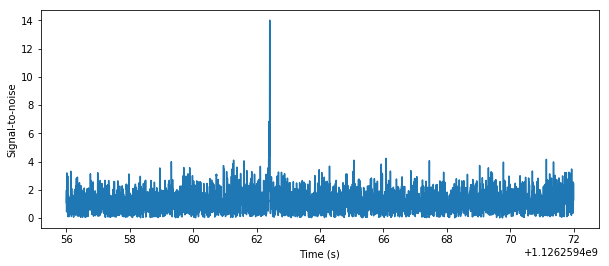

We found a signal at 1126259462.416504s with SNR 14.008626031103411, m = 57


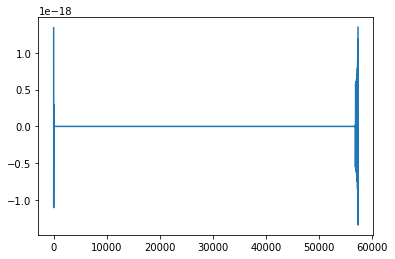

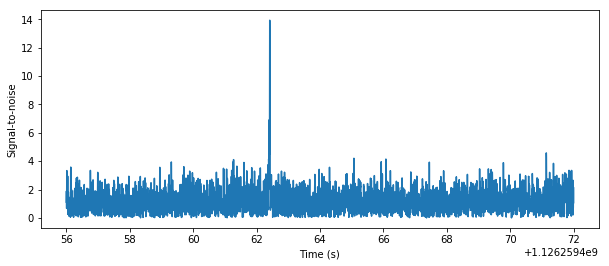

We found a signal at 1126259462.4160156s with SNR 13.925122271798003, m = 58


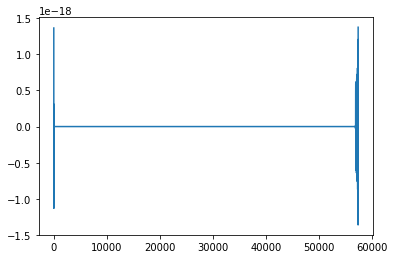

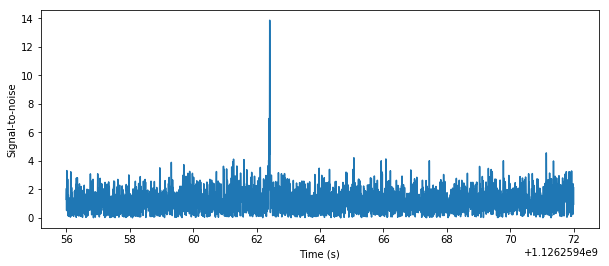

We found a signal at 1126259462.4155273s with SNR 13.87204518882687, m = 59


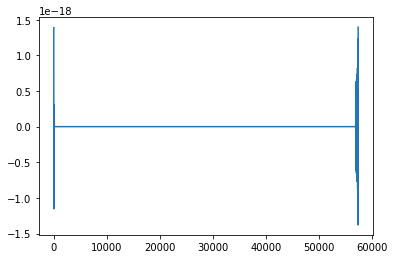

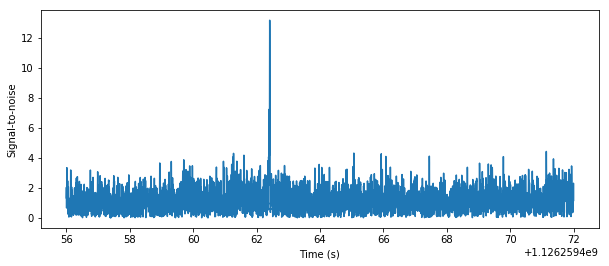

We found a signal at 1126259462.415039s with SNR 13.179077420849115, m = 60


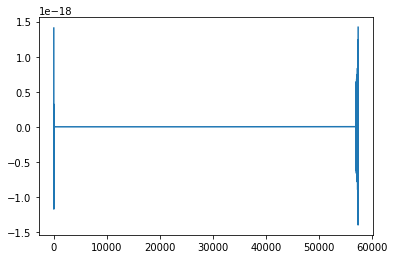

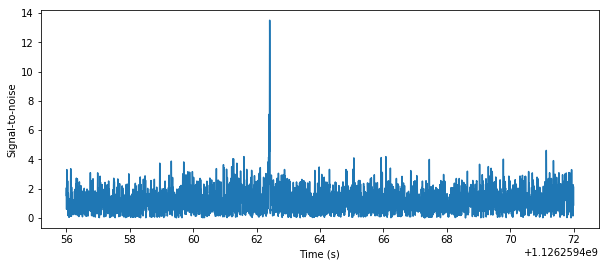

We found a signal at 1126259462.4145508s with SNR 13.499631182705091, m = 61


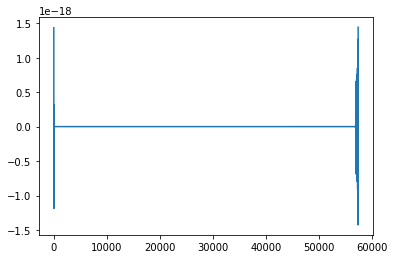

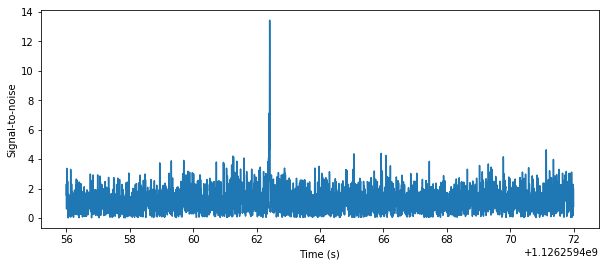

We found a signal at 1126259462.4140625s with SNR 13.444866127945009, m = 62


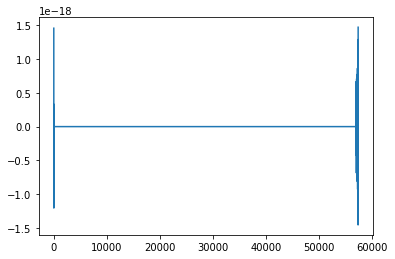

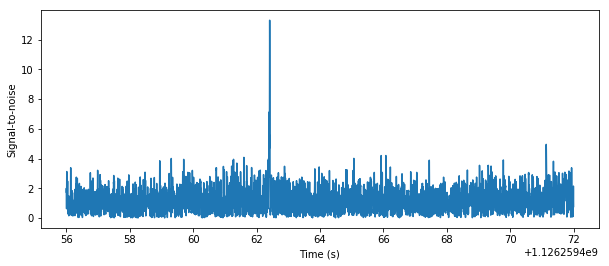

We found a signal at 1126259462.4140625s with SNR 13.299910409928188, m = 63


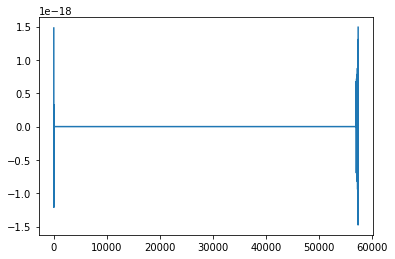

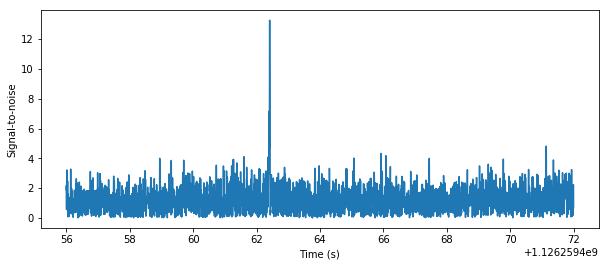

We found a signal at 1126259462.4135742s with SNR 13.263987574605101, m = 64


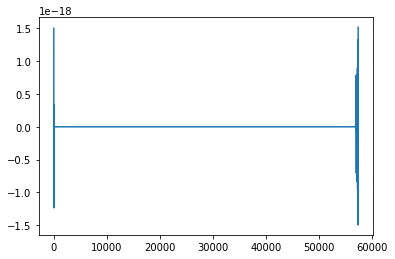

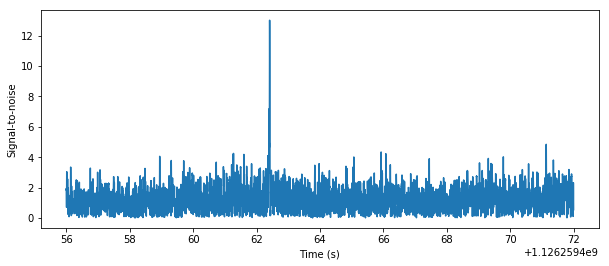

We found a signal at 1126259462.4125977s with SNR 13.011417936331979, m = 65


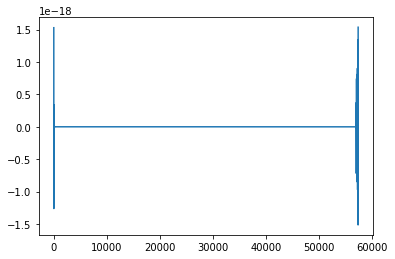

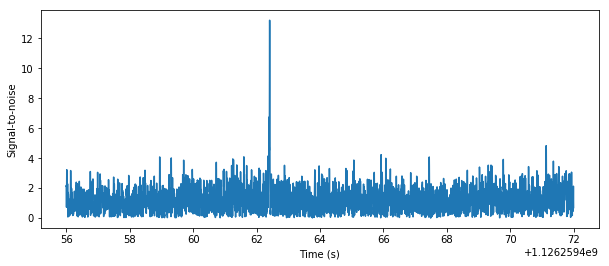

We found a signal at 1126259462.413086s with SNR 13.220002795677564, m = 66


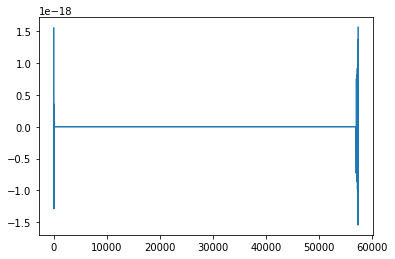

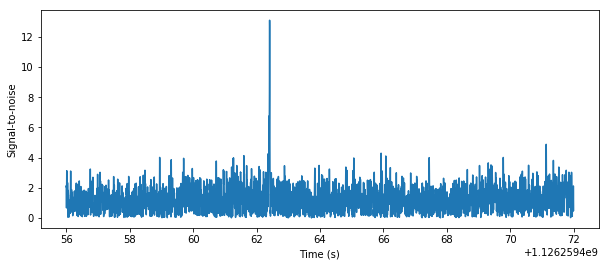

We found a signal at 1126259462.4121094s with SNR 13.096244114459846, m = 67


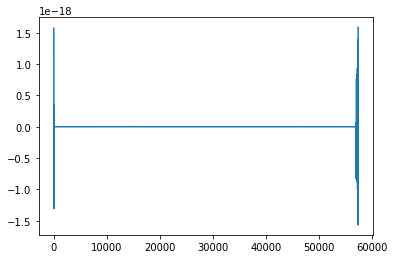

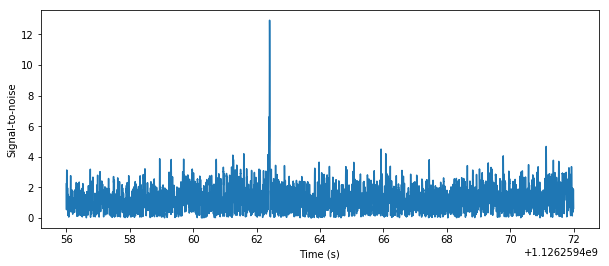

We found a signal at 1126259462.411621s with SNR 12.930839876789086, m = 68


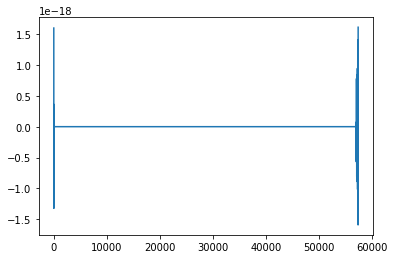

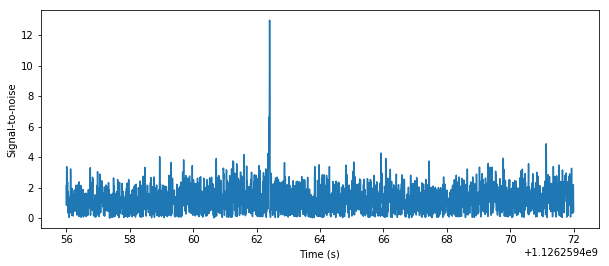

We found a signal at 1126259462.411621s with SNR 12.978872189383777, m = 69


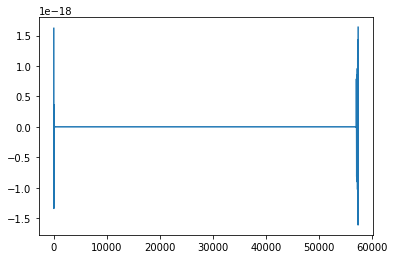

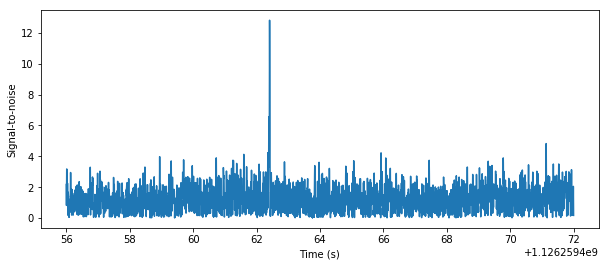

We found a signal at 1126259462.4111328s with SNR 12.821140638175752, m = 70


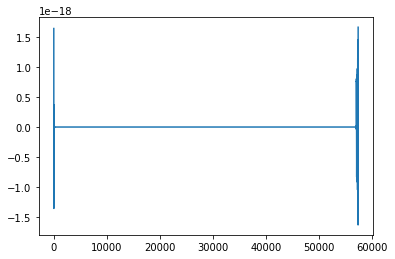

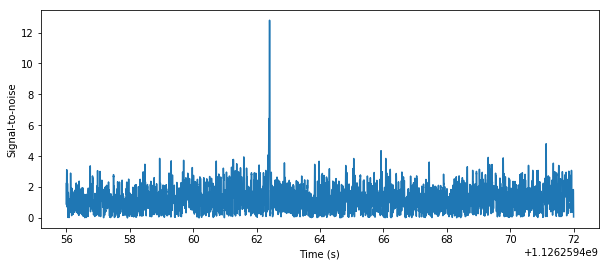

We found a signal at 1126259462.4106445s with SNR 12.798417300583958, m = 71


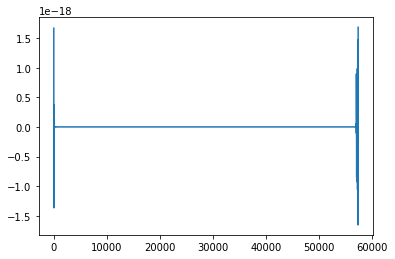

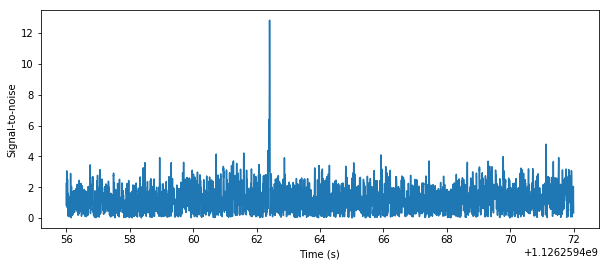

We found a signal at 1126259462.4106445s with SNR 12.837257553833535, m = 72


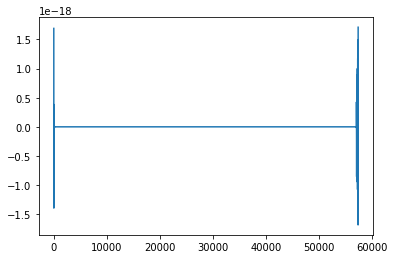

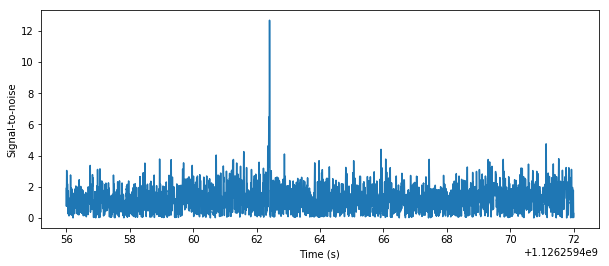

We found a signal at 1126259462.409668s with SNR 12.669693338117224, m = 73


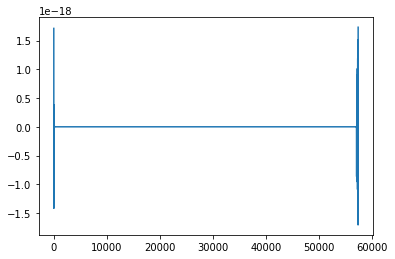

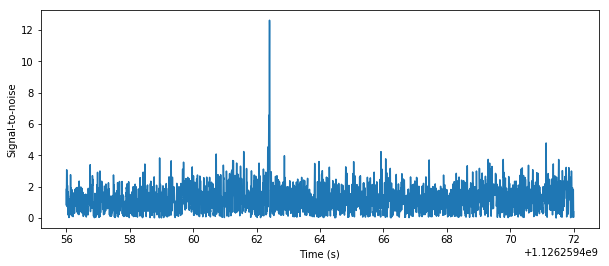

We found a signal at 1126259462.4091797s with SNR 12.621410495123365, m = 74


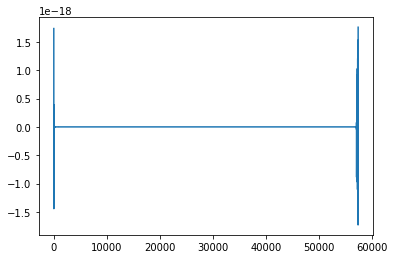

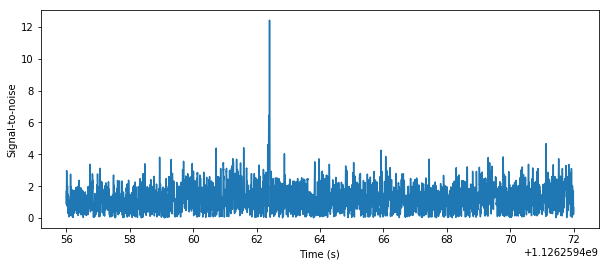

We found a signal at 1126259462.4091797s with SNR 12.407258662748509, m = 75


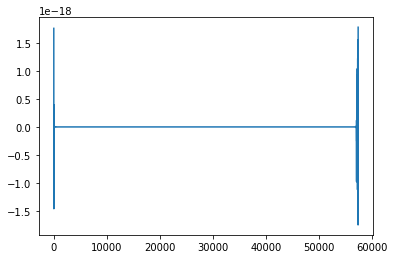

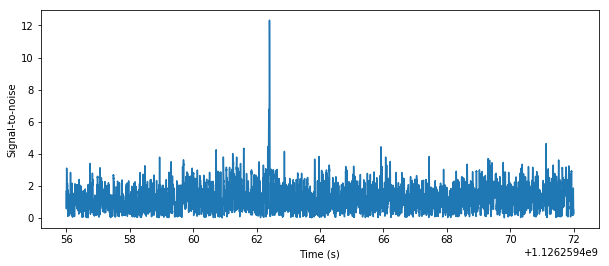

We found a signal at 1126259462.4077148s with SNR 12.326382851176698, m = 76


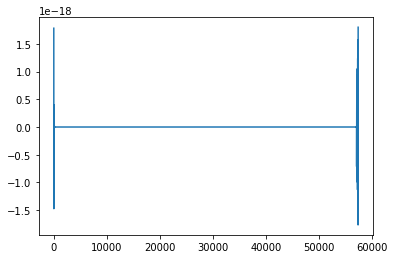

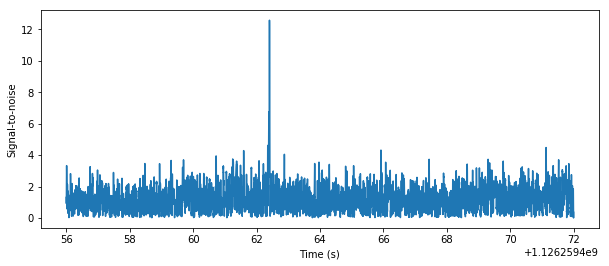

We found a signal at 1126259462.4077148s with SNR 12.58439282845002, m = 77


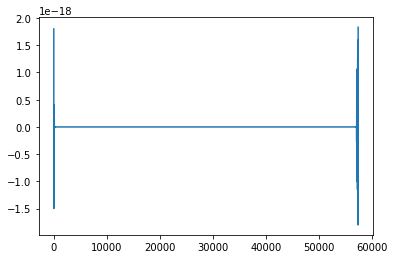

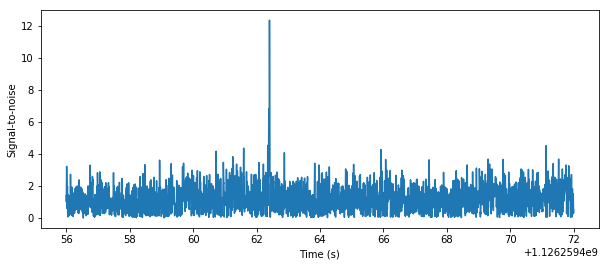

We found a signal at 1126259462.4077148s with SNR 12.366435936200446, m = 78


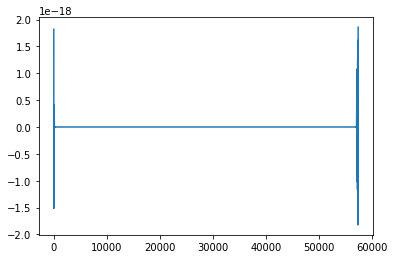

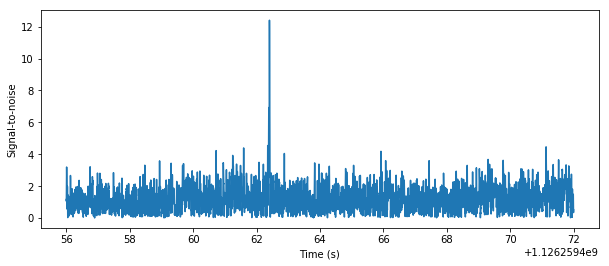

We found a signal at 1126259462.4072266s with SNR 12.397800954739703, m = 79


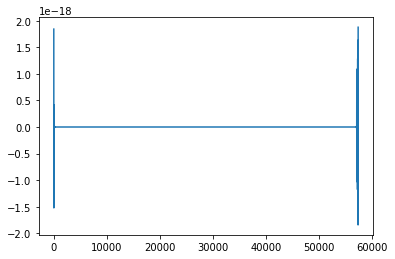

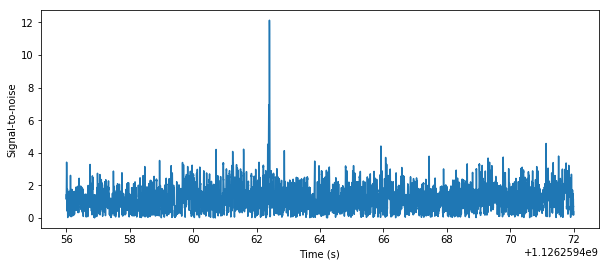

We found a signal at 1126259462.4067383s with SNR 12.138224405346756, m = 80


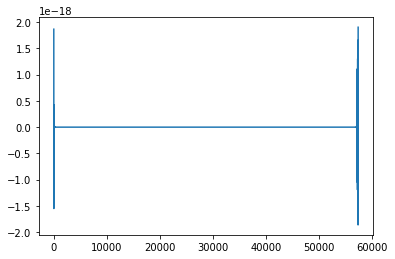

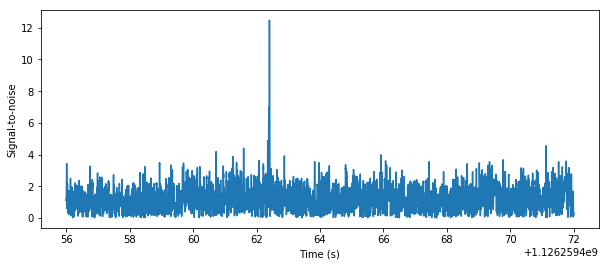

We found a signal at 1126259462.4067383s with SNR 12.475350991104772, m = 81


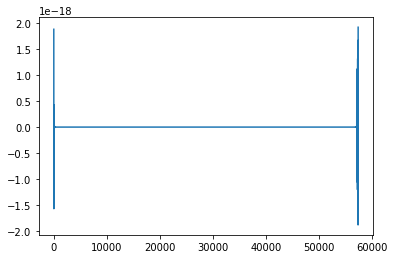

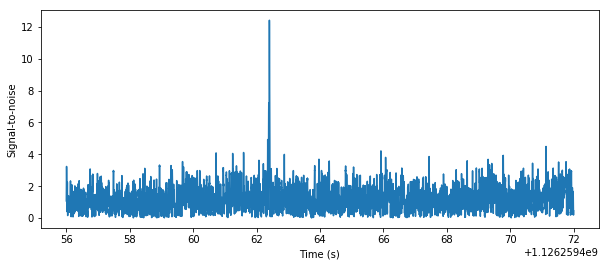

We found a signal at 1126259462.4052734s with SNR 12.41141143616151, m = 82


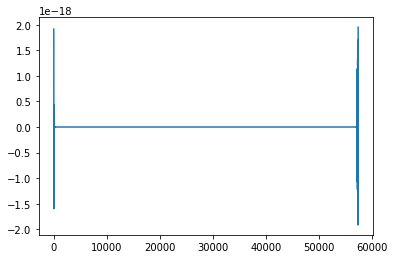

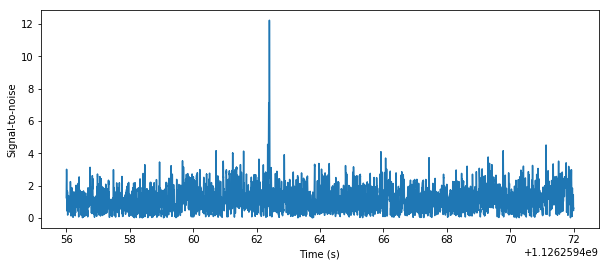

We found a signal at 1126259462.4052734s with SNR 12.219431369277693, m = 83


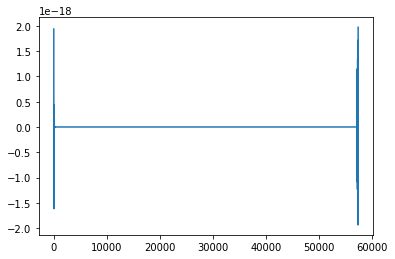

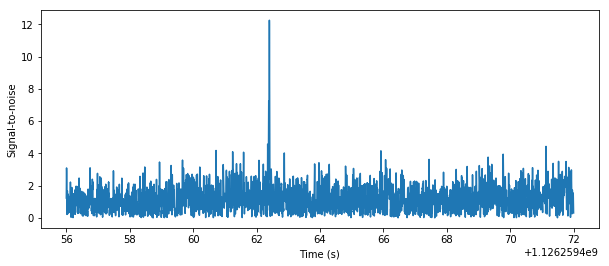

We found a signal at 1126259462.4047852s with SNR 12.251037404950473, m = 84


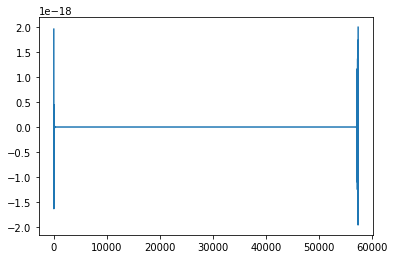

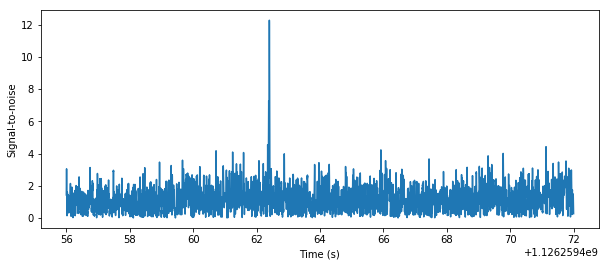

We found a signal at 1126259462.4038086s with SNR 12.274290711811037, m = 85


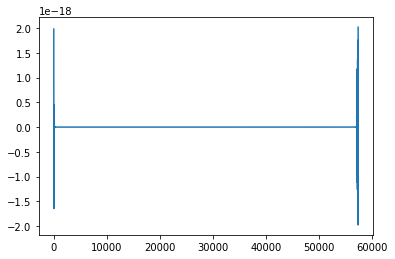

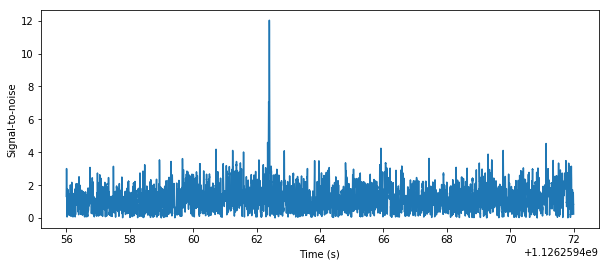

We found a signal at 1126259462.4038086s with SNR 12.025757254843166, m = 86


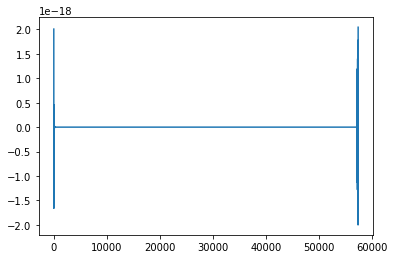

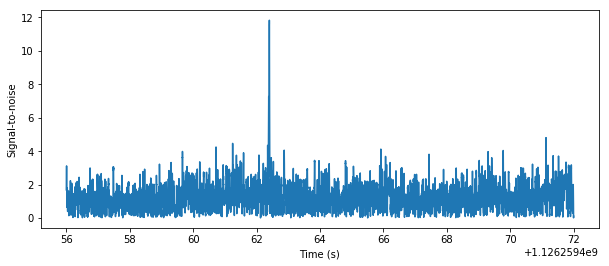

We found a signal at 1126259462.4042969s with SNR 11.834548135933863, m = 87


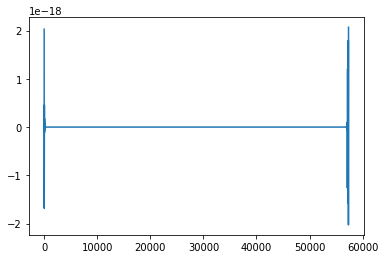

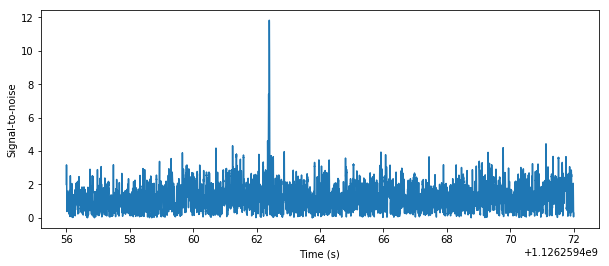

We found a signal at 1126259462.4018555s with SNR 11.82342468402716, m = 88


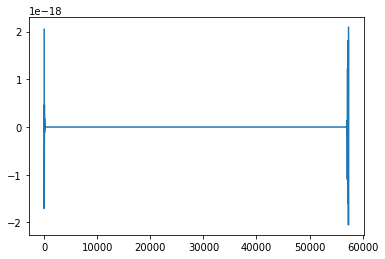

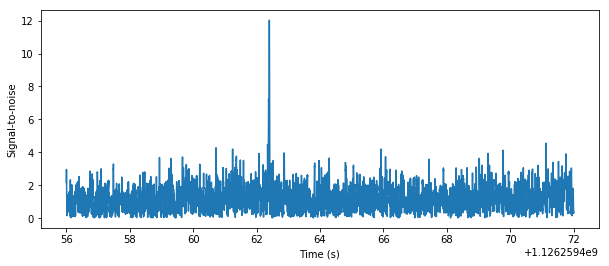

We found a signal at 1126259462.4033203s with SNR 12.02345305992081, m = 89


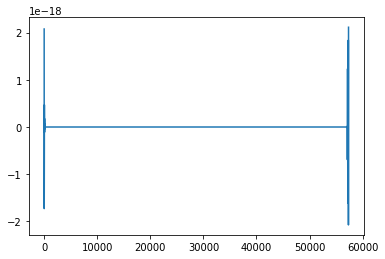

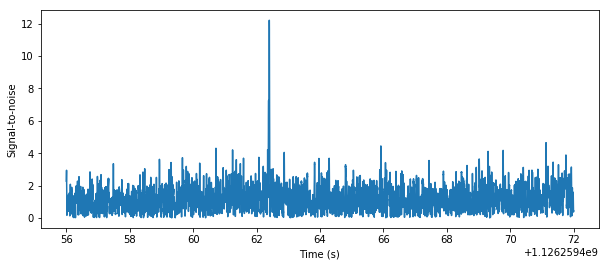

We found a signal at 1126259462.4018555s with SNR 12.211385044044489, m = 90


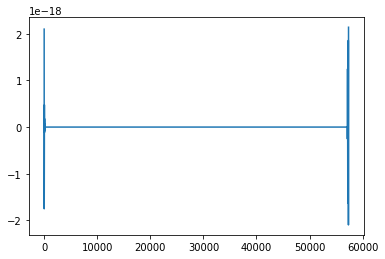

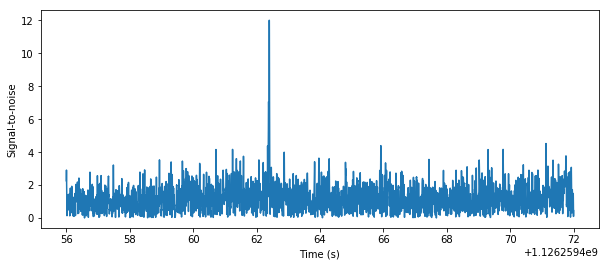

We found a signal at 1126259462.4013672s with SNR 12.014241951534498, m = 91


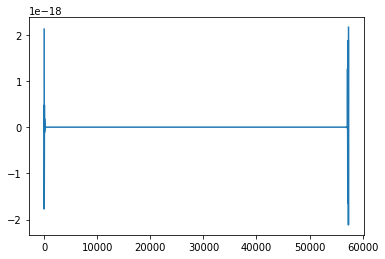

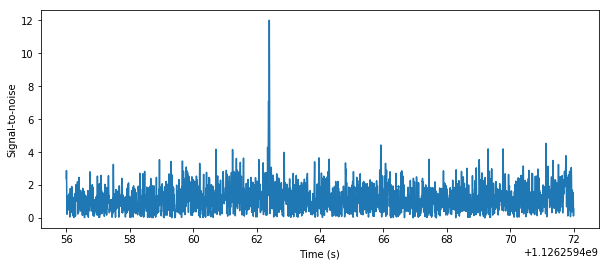

We found a signal at 1126259462.4013672s with SNR 12.00768696568521, m = 92


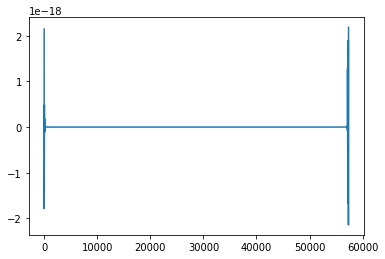

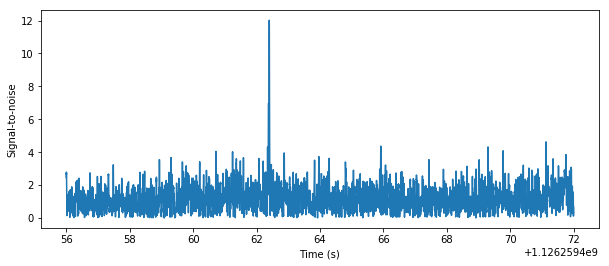

We found a signal at 1126259462.400879s with SNR 12.01768659606859, m = 93


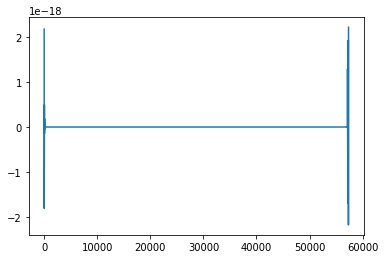

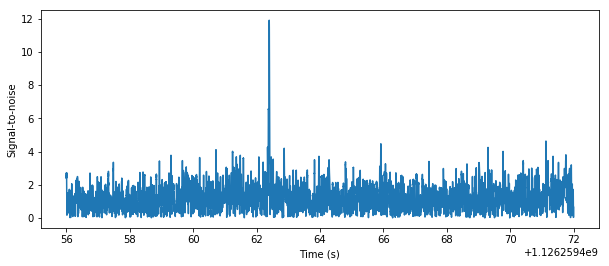

We found a signal at 1126259462.3999023s with SNR 11.907583007229528, m = 94


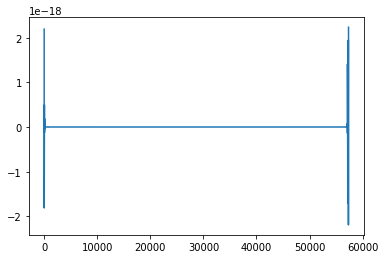

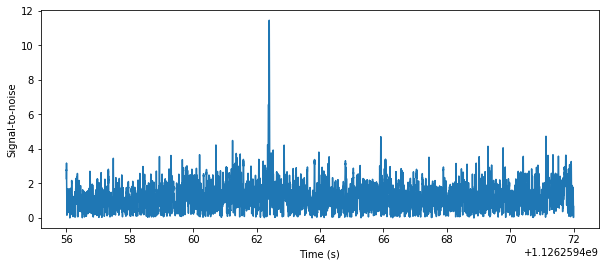

We found a signal at 1126259462.4003906s with SNR 11.462763210782866, m = 95


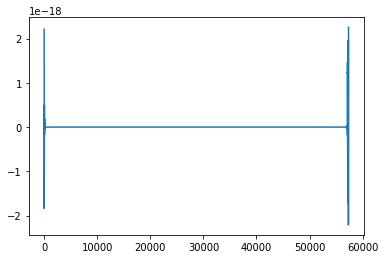

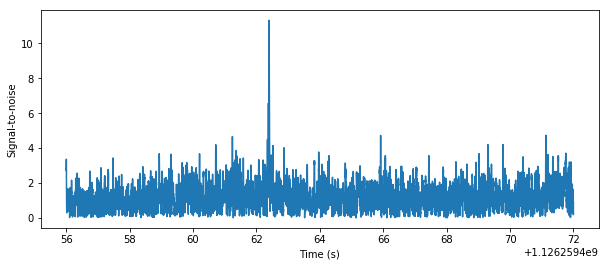

We found a signal at 1126259462.4013672s with SNR 11.324199924878004, m = 96


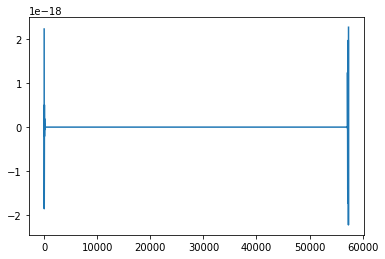

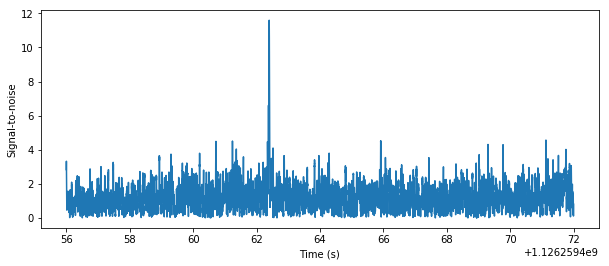

We found a signal at 1126259462.399414s with SNR 11.592039628358599, m = 97


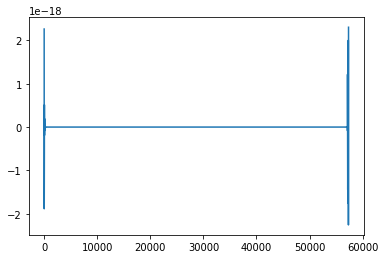

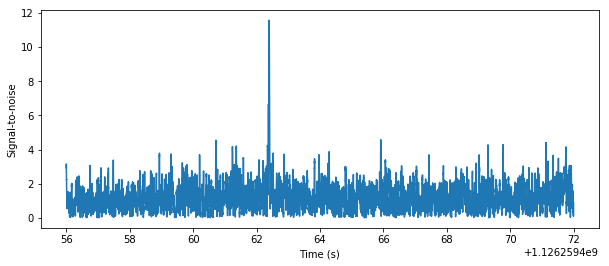

We found a signal at 1126259462.3979492s with SNR 11.570547312485846, m = 98


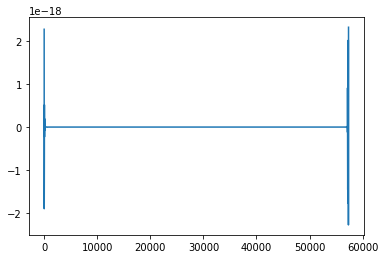

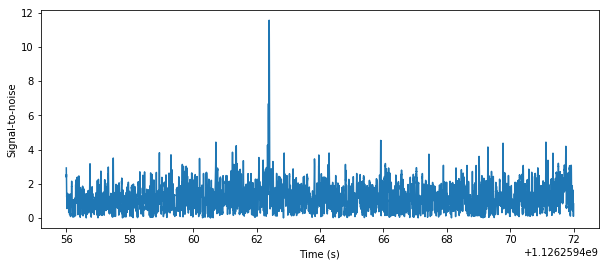

We found a signal at 1126259462.3984375s with SNR 11.55973443277958, m = 99


In [66]:
from pycbc.filter import matched_filter

for m in range(10,100):# Solar masses
    if 36 == 36:
        hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                                 mass1=m,
                                 mass2=m,
                                 delta_t=conditioned.delta_t,
                                 f_lower=20)

        hp.resize(len(conditioned))

        template = hp.cyclic_time_shift(hp.start_time)
        pylab.plot(template)
        pylab.show()

        
        snr = matched_filter(template, conditioned,
                             psd=psd, low_frequency_cutoff=20)
        snr = snr.crop(4 + 4, 4)
        pylab.figure(figsize=[10, 4])
        pylab.plot(snr.sample_times, abs(snr))
        pylab.ylabel('Signal-to-noise')
        pylab.xlabel('Time (s)')
        pylab.show()

        peak = abs(snr).numpy().argmax()
        snrp = snr[peak]
        time = snr.sample_times[peak]

        print("We found a signal at {}s with SNR {}, m = {}".format(time, 
                                                            abs(snrp),m))